In [23]:
import json
import pandas as pd
import plotly.express as px

def extract_benchmark_class(benchmark):
    return benchmark.split('.')[-2]

def load_results(profile, benchmarks):
    scores = []
    
    for benchmark in benchmarks:
        with open(f'results/{profile}/{benchmark}.json') as file:
            results = json.load(file)
            scores_raw = [(extract_benchmark_class(i['benchmark']),i['threads'],int(i['params']['size']),i['primaryMetric']['score']) for i in results]
            scores.append(pd.DataFrame(data=scores_raw, columns=['benchmark','threads','size','score']))
        
    return pd.concat(scores)

def create_chart(scores):
    labels = {'score':'Ops/sec','threads':'Threads count','benchmark':'Benchmark'}
    chart = px.line(data_frame = scores,x = 'threads', y='score', color='benchmark',labels = labels, markers = True)
    chart.update_layout(legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='left',x=0.01))
    chart.update_layout({'plot_bgcolor':'rgba(0, 0, 0, 0)'})
    chart.update_layout(xaxis = dict(tick0 = 2,dtick = 2))
    

    return chart

def write_chart(chart, profile, benchmark):
    chart.write_image(f'img/{profile}/{benchmark}.png',width='700')

    return chart

pd.options.display.float_format = '{:,.2f}'.format
profile = 'default'

# Doubles calculation

In [24]:
benchmark = 'benchmark-threads-streams-sum-double-calculation'
scores = load_results(profile, [f'{benchmark}-sequential',f'{benchmark}-parallel'])
scores.loc[scores['benchmark']=='SequentialDoubleCalculationBenchmark','benchmark'] = 'Sequential'
scores.loc[scores['benchmark']=='ParallelDoubleCalculationBenchmark','benchmark'] = 'Parallel'
scores

,benchmark,threads,size,score
0,Sequential,2,1000,"68,119.50"
1,Sequential,2,100000,668.39
2,Sequential,4,1000,"128,778.21"
3,Sequential,4,100000,"1,291.00"
4,Sequential,6,1000,"134,242.05"
5,Sequential,6,100000,"1,121.08"
6,Sequential,8,1000,"135,435.81"
7,Sequential,8,100000,"1,302.58"
8,Sequential,10,1000,"131,054.70"
9,Sequential,10,100000,"1,261.59"


## 1000 items

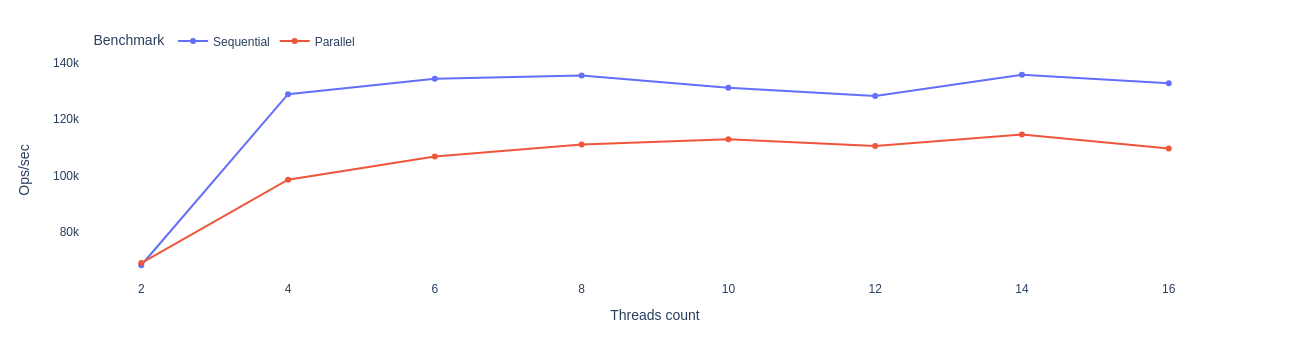

In [25]:
items = 1000
chart = create_chart(scores.loc[scores['size']==items])
write_chart(chart,profile,f'{benchmark}-{items}')
chart

## 100000 items

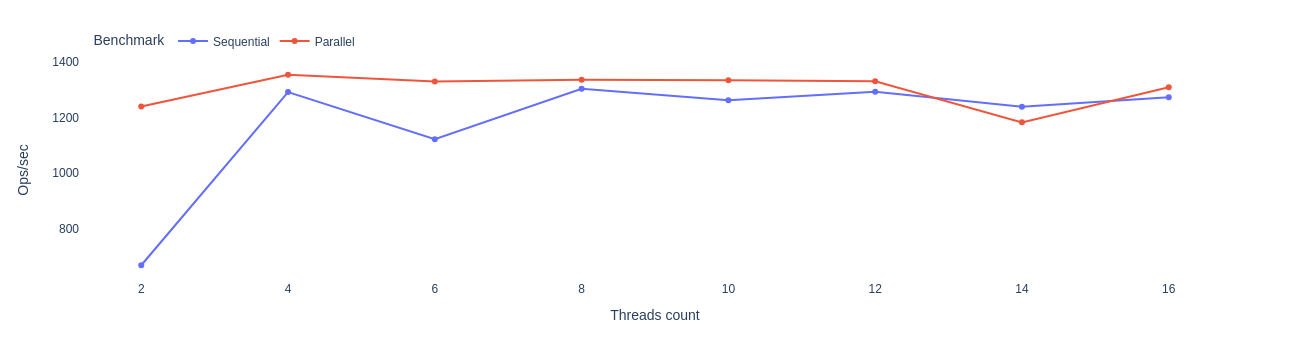

In [26]:
items = 100000
chart = create_chart(scores.loc[scores['size']==items])
write_chart(chart,profile,f'{benchmark}-{items}')
chart

# Grouping

In [27]:
benchmark = 'benchmark-threads-streams-group'
scores = load_results(
    profile, 
    [
        f'{benchmark}-sequential',
        f'{benchmark}-parallel',
        f'{benchmark}-parallel-concurrent'
    ])
scores.loc[scores['benchmark']=='SequentialGroupBenchmark','benchmark'] = 'Sequential'
scores.loc[scores['benchmark']=='ParallelGroupBenchmark','benchmark'] = 'Parallel'
scores.loc[scores['benchmark']=='ParallelGroupConcurrentBenchmark','benchmark'] = 'Parallel concurrent'
scores

,benchmark,threads,size,score
0,Sequential,2,1000,"99,978.76"
1,Sequential,2,100000,"1,016.04"
2,Sequential,4,1000,"205,435.32"
3,Sequential,4,100000,"1,804.12"
4,Sequential,6,1000,"187,740.45"
5,Sequential,6,100000,"1,906.14"
6,Sequential,8,1000,"199,575.73"
7,Sequential,8,100000,"1,995.09"
8,Sequential,10,1000,"167,850.77"
9,Sequential,10,100000,"1,683.83"


# 1000 items

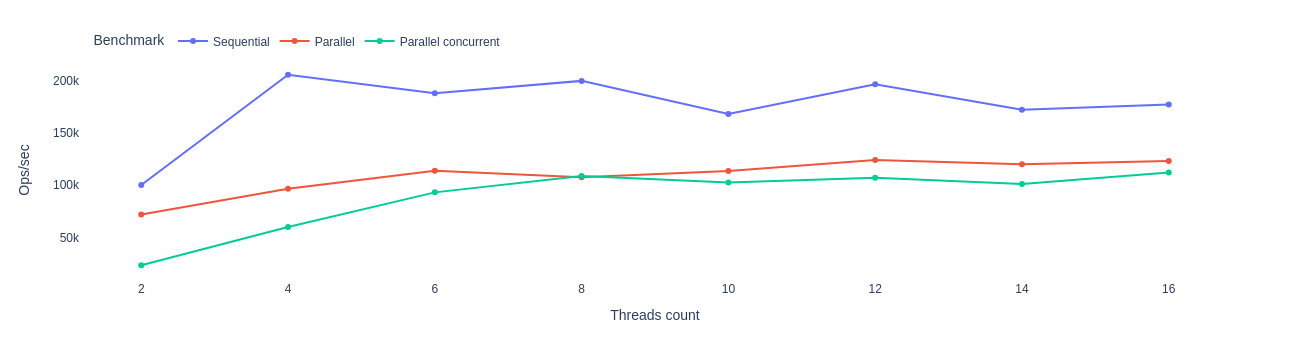

In [28]:
items = 1000
chart = create_chart(scores.loc[scores['size']==items])
write_chart(chart,profile,f'{benchmark}-{items}')
chart

# 100000 items

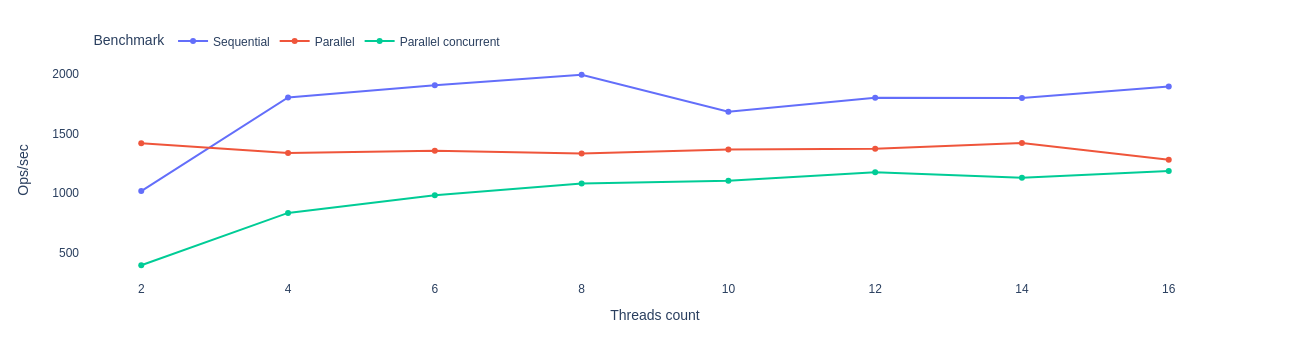

In [29]:
items = 100000
chart = create_chart(scores.loc[scores['size']==items])
write_chart(chart,profile,f'{benchmark}-{items}')
chart

# Filtering and sorting distinct items

In [31]:
benchmark = 'benchmark-threads-streams-filter-sort-distinct'
scores = load_results(
    profile, 
    [
        f'{benchmark}-sequential',
        f'{benchmark}-parallel'
    ])
scores.loc[scores['benchmark']=='SequentialFilterSortDistinctBenchmark','benchmark'] = 'Sequential'
scores.loc[scores['benchmark']=='ParallelFilterSortDistinctBenchmark','benchmark'] = 'Parallel'
scores

,benchmark,threads,size,score
0,Sequential,2,1000,"78,071.00"
1,Sequential,2,100000,"1,372.05"
2,Sequential,4,1000,"149,303.84"
3,Sequential,4,100000,"2,931.62"
4,Sequential,6,1000,"117,839.08"
5,Sequential,6,100000,"2,967.81"
6,Sequential,8,1000,"103,064.25"
7,Sequential,8,100000,"2,688.66"
8,Sequential,10,1000,"120,288.99"
9,Sequential,10,100000,"2,998.43"


## 1000 items

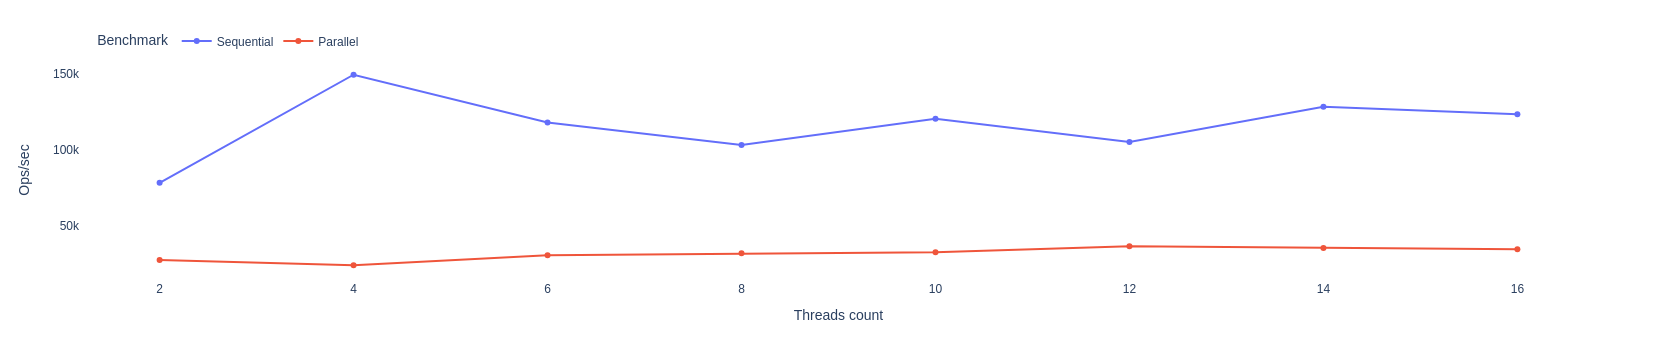

In [32]:
items = 1000
chart = create_chart(scores.loc[scores['size']==items])
write_chart(chart,profile,f'{benchmark}-{items}')
chart

## 100000 items

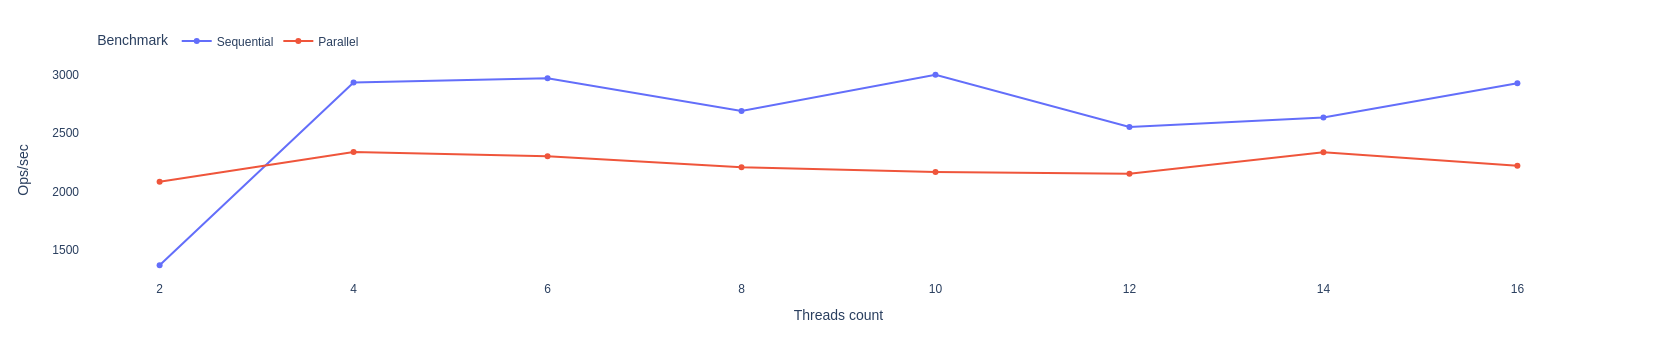

In [33]:
items = 100000
chart = create_chart(scores.loc[scores['size']==items])
write_chart(chart,profile,f'{benchmark}-{items}')
chart